In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# minus 폰트 깨짐 방지
plt.rc('axes', unicode_minus = False)

#한글 폰트 설정
plt.rc('font', family='NanumGothic')

# retina 설정
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('retina')

# csv 파일 불러오기
df = pd.read_csv("data file/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory = False)

In [40]:
# 결측치 확인하기
null_count = df.isnull().sum()
null_count

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

null_count라는 변수에 isnull().sum()을 해서 각 column 별 결측치의 개수를 확인합니다.

여기서 boolean indexing을 사용하는데, True는 1 이니 isnull()을 하여 해당 데이터가 결측치라면 True를 출력하고, True의 개수를 세줍니다.

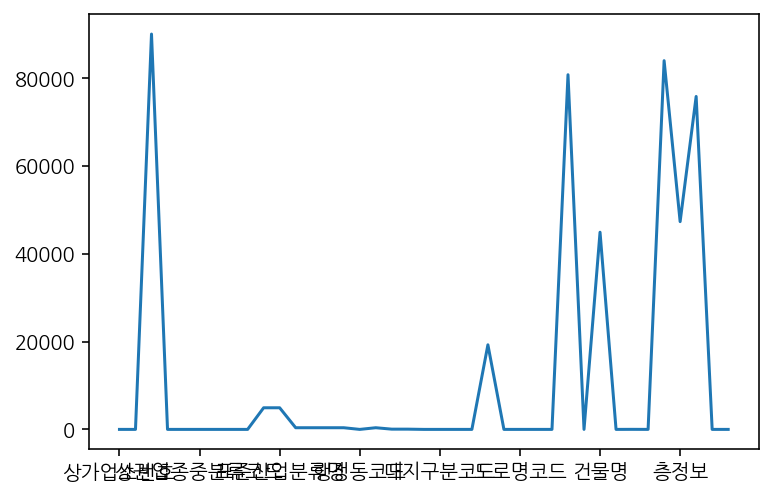

In [41]:
#결측치 시각화 하기

#1) 기본그래프
null_count.plot()

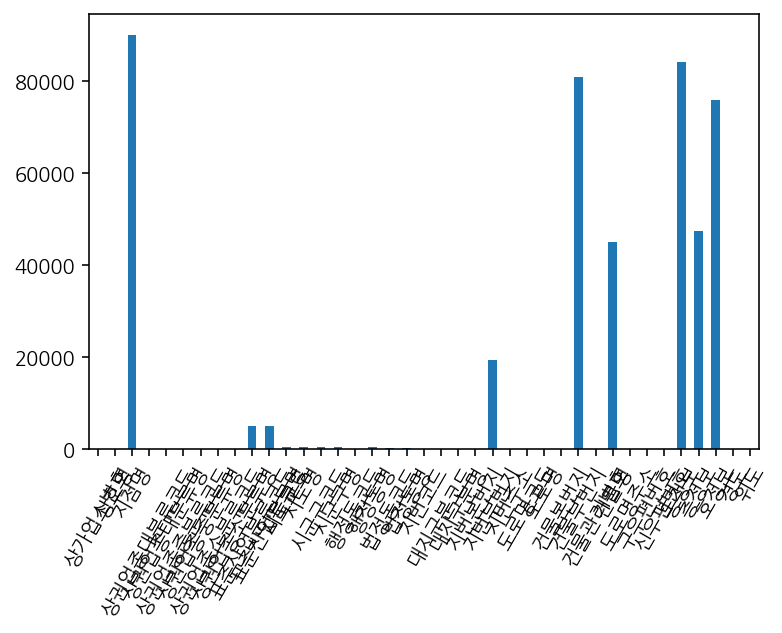

In [42]:
#2) bar그래프
null_count.plot.bar(rot=60)
#rot을 옵션으로 지정해주면 글자들이 회전하여 표시됩니다.

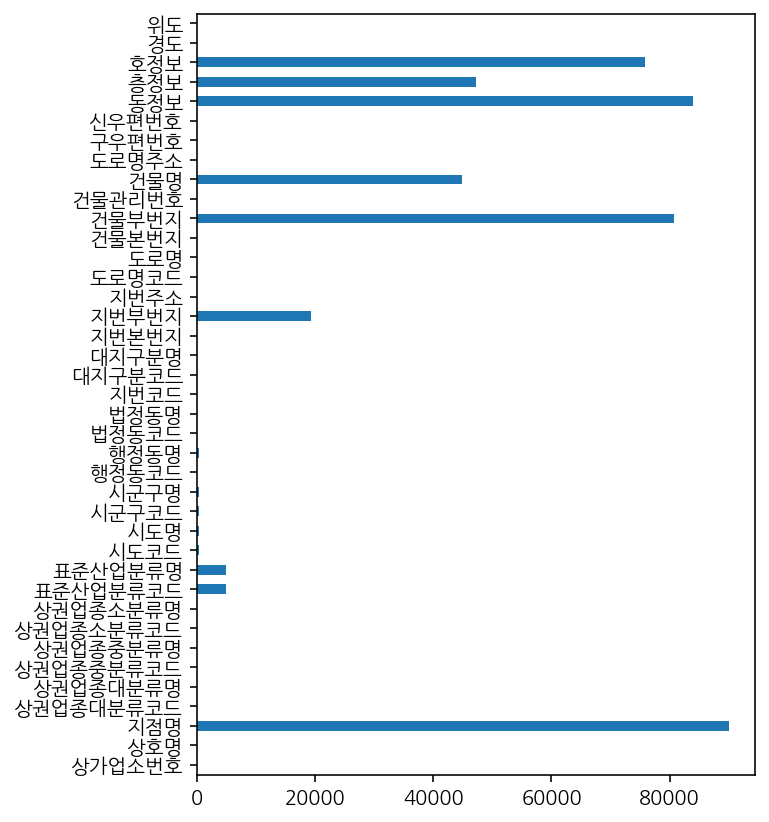

In [43]:
# barh 그래프
null_count.plot.barh(figsize=(5, 7))
# figsize= 사이즈

In [44]:
# 데이터 프레임 형태로 변형하기

#1) 인덱스 초기화 하기
df_null_count = null_count.reset_index()
df_null_count.head()

,index,0
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0


In [45]:
#2) 새로운 칼럼면 지정하기
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0
7,상권업종소분류코드,0
8,상권업종소분류명,0
9,표준산업분류코드,4922


In [46]:
#결측치만 보기
df_null_count.sort_values(by = "결측치수", ascending = False)
#ascending = 정렬기준 true = 오름차순 false = 내림차순

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [47]:
#상위 10개만
df_null_count_top = df_null_count.sort_values(by="결측치수", ascending=False).head(10)
df_null_count_top

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [48]:
#특정 칼럼만 불러오기
df["지점명"].head()

0    NaN
1    NaN
2    NaN
3    NaN
4    수지점
Name: 지점명, dtype: object

In [49]:
#1) 컬럼명 리스트화 하기
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [50]:
#2) 삭제할 컬럼 확인하기
df[drop_columns].head()

,지점명,동정보,건물부번지,호정보,층정보,건물명,지번부번지,표준산업분류코드,표준산업분류명,시도코드
0,NaN,NaN,NaN,NaN,NaN,산호한양아파트,NaN,Q86201,일반 의원,41.0
1,NaN,NaN,NaN,NaN,4,NaN,14.0,Q86201,일반 의원,11.0
2,NaN,NaN,NaN,NaN,NaN,한라프라자,1.0,Q86201,일반 의원,41.0
3,NaN,NaN,NaN,NaN,5,NaN,1.0,NaN,NaN,26.0
4,수지점,NaN,NaN,NaN,1,NaN,2.0,G47811,의약품 및 의료용품 소매업,41.0


In [51]:
print(df)

#3) 컬럼 삭제하기
df = df.drop(drop_columns, axis=1)
print(df)

         상가업소번호           상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  상권업종중분류명  \
0      19956873        하나산부인과   NaN         S       의료       S01        병원   
1      20024149      타워광명내과의원   NaN         S       의료       S01        병원   
2      20152277     조정현신경외과의원   NaN         S       의료       S01        병원   
3      20350610      한귀원정신과의원   NaN         S       의료       S01        병원   
4      20364049     더블유스토어수지점   수지점         S       의료       S02    약국/한약방   
...         ...           ...   ...       ...      ...       ...       ...   
91330  16196725         온누리약국   베스트         S       의료       S02    약국/한약방   
91331  16192180            리원  봄산후조         S       의료       S07  의료관련서비스업   
91332  16127538       참좋은요양병원   NaN         S       의료       S01        병원   
91333  16108681       경희중앙한의원   NaN         S       의료       S01        병원   
91334  16109073  천안김안과천안역본점의원   NaN         S       의료       S01        병원   

      상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...                     건물관리